## PICKLE files and .npy arrays used for brain states 

In [20]:
import os 
import pandas as pd 
import numpy as np 

import mne
import matplotlib.pyplot

In [3]:
#select the file path - this changes the working directory to the folder with all the files you want to analyse
os.chdir('/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project/S7098')

In [7]:
#load all the necessary files for one day of one animal 
animal_7098 = np.load('TAINI_1047_S7098-D2-2021_07_01-0000.npy')
br_1_7098 = pd.read_pickle('brain_states_1_S7098.pkl')

In [9]:
#view raw recording
animal_7098

array([[   0,   -2, 1377, ..., 2515, 2519, 2516],
       [   0,   -2, 1364, ..., 2511, 2524, 2533],
       [   0,   -2, 1394, ..., 2524, 2524, 2527],
       ...,
       [   0,   -2, 1353, ..., 2461, 2461, 2463],
       [   0,   -2, 1341, ..., 2492, 2471, 2472],
       [   0,   -2, 1344, ..., 2482, 2486, 2482]], dtype=int16)

In [10]:
#brainstate
br_1_7098

,brainstate,start_epoch,end_epoch
0,0,0,5
1,0,5,10
2,0,10,15
3,0,15,20
4,0,20,25
...,...,...,...
17274,1,86370,86375
17275,1,86375,86380
17276,1,86380,86385
17277,1,86385,86390


In [11]:
start = 35246305
end = 56880864

In [13]:
#save a new object which just considers recording in this time frame
sliced_recording = animal_7098[:, start:end] 
sliced_recording

array([[2645, 2645, 2645, ..., 2644, 2643, 2643],
       [2676, 2679, 2676, ..., 2613, 2612, 2612],
       [2624, 2628, 2633, ..., 2601, 2600, 2599],
       ...,
       [2544, 2547, 2551, ..., 2542, 2539, 2538],
       [2609, 2610, 2610, ..., 2554, 2551, 2551],
       [2579, 2582, 2582, ..., 2581, 2582, 2581]], dtype=int16)

<span style="color:blue">*This is the raw data before any filtering.* </span> 

## <span style="color:blue">*Plotting the whole data:* </span> 

Creating RawArray with float64 data, n_channels=16, n_times=21634559
    Range : 0 ... 21634558 =      0.000 ... 86399.992 secs
Ready.


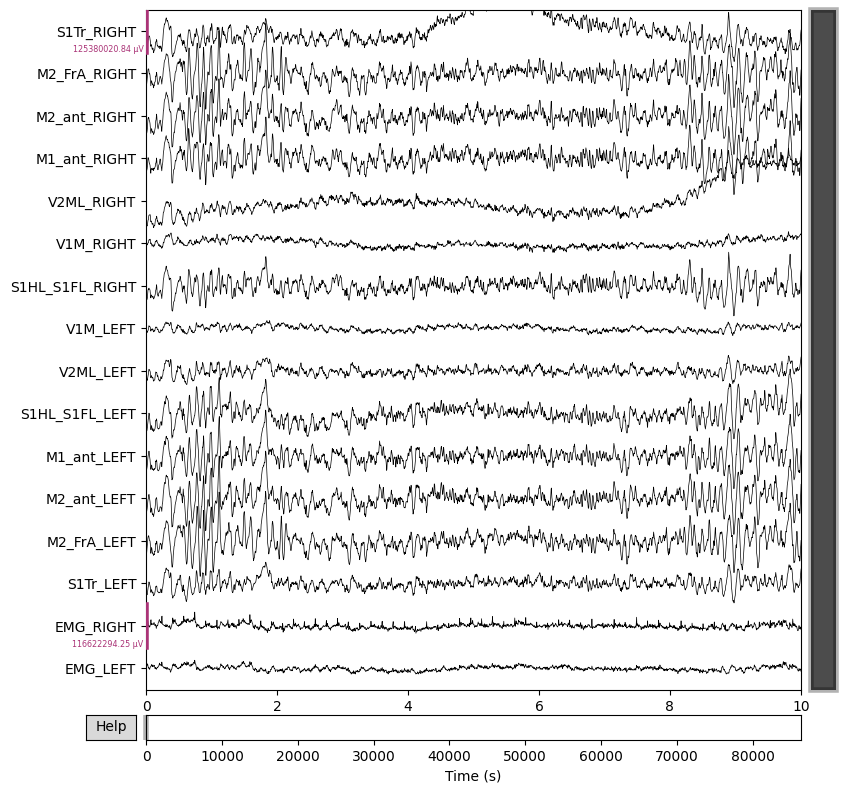

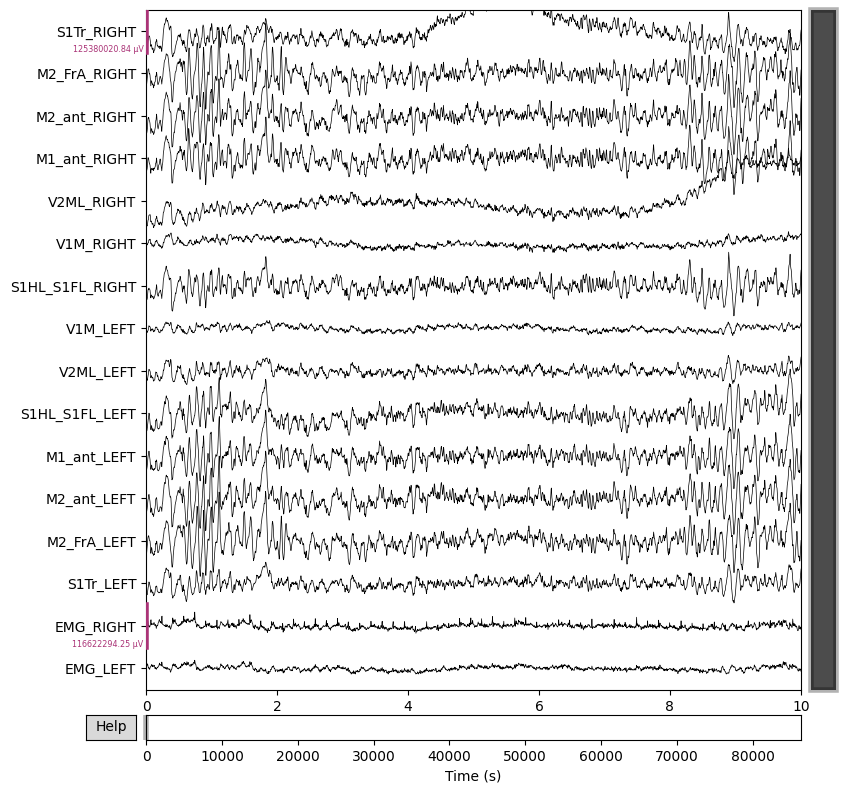

In [23]:
ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT','M2_ant_RIGHT','M1_ant_RIGHT', 'V2ML_RIGHT',
            'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT',
            'M1_ant_LEFT','M2_ant_LEFT','M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_types = ['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'emg', 'eeg']

raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)

raw = mne.io.RawArray(sliced_recording, raw_info)

raw.plot(scalings="auto")

## <span style="color:blue">*Plotting different brain states* </span> 

In [16]:
wake = br_1_7098.loc[br_1_7098.brainstate == 0].sample() # Wake
wake

,brainstate,start_epoch,end_epoch
9426,0,47130,47135


In [25]:
wake_time_start = int(wake.start_epoch * 250.4)
wake_time_end = int(wake.end_epoch * 250.4)
w = sliced_recording[:, wake_time_start:wake_time_end]

Creating RawArray with float64 data, n_channels=16, n_times=1252
    Range : 0 ... 1251 =      0.000 ...     4.996 secs
Ready.


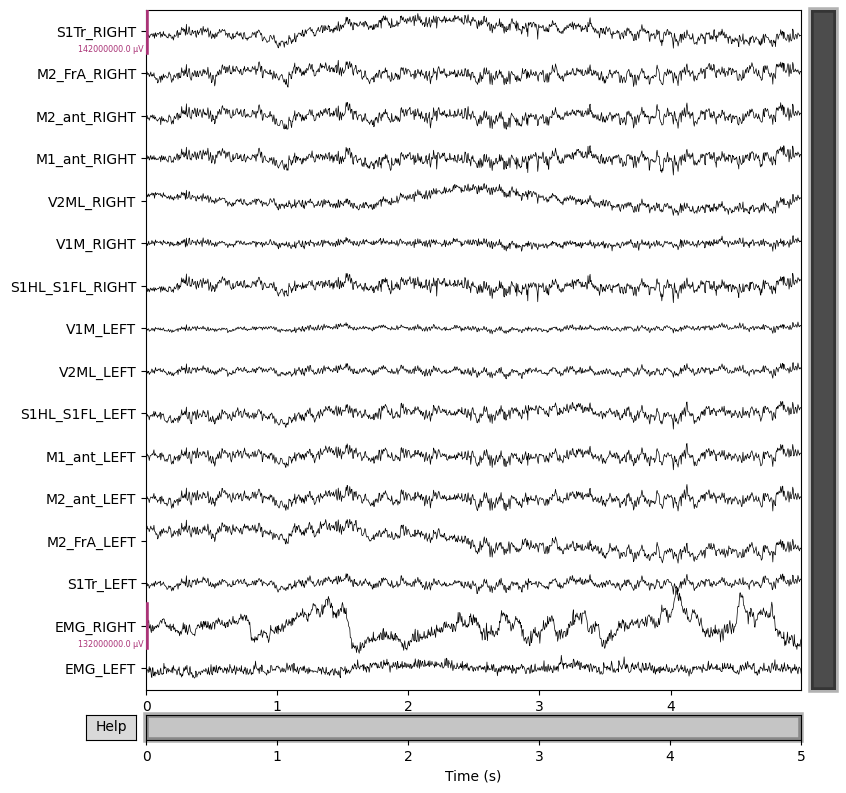

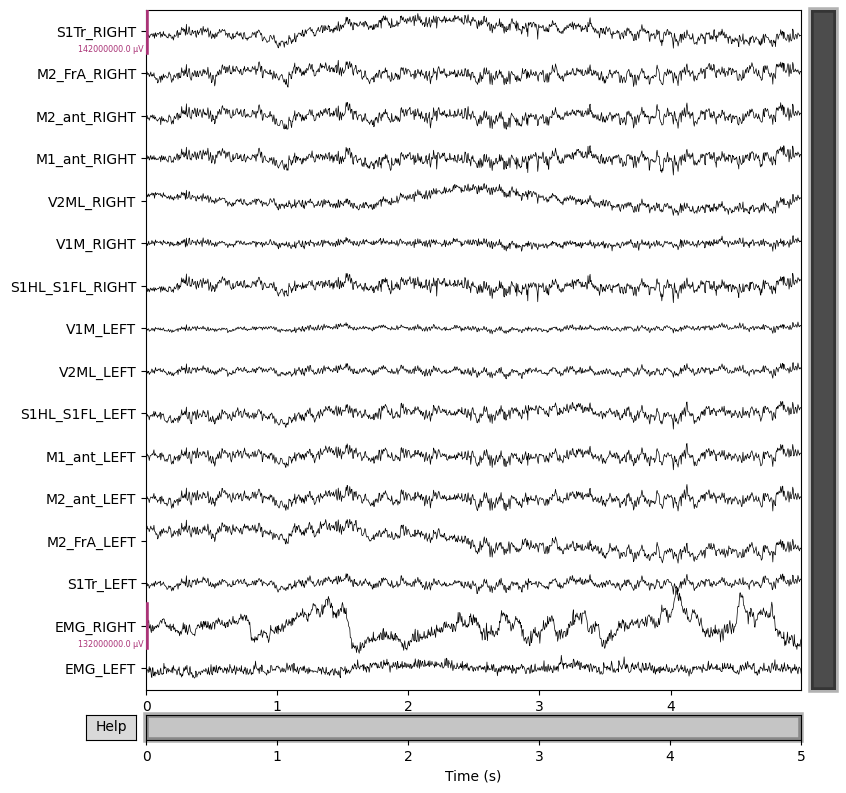

In [26]:
ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT','M2_ant_RIGHT','M1_ant_RIGHT', 'V2ML_RIGHT',
            'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT',
            'M1_ant_LEFT','M2_ant_LEFT','M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_types = ['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'emg', 'eeg']

raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)

raw = mne.io.RawArray(w, raw_info)

raw.plot(scalings="auto")

In [27]:
nonrem = br_1_7098.loc[br_1_7098.brainstate == 1].sample() # Non-REM
nonrem

,brainstate,start_epoch,end_epoch
2201,1,11005,11010


In [28]:
nonrem_time_start = int(nonrem.start_epoch * 250.4)
nonrem_time_end = int(nonrem.end_epoch * 250.4)
nr = sliced_recording[:, nonrem_time_start:nonrem_time_end]

Creating RawArray with float64 data, n_channels=16, n_times=1252
    Range : 0 ... 1251 =      0.000 ...     4.996 secs
Ready.


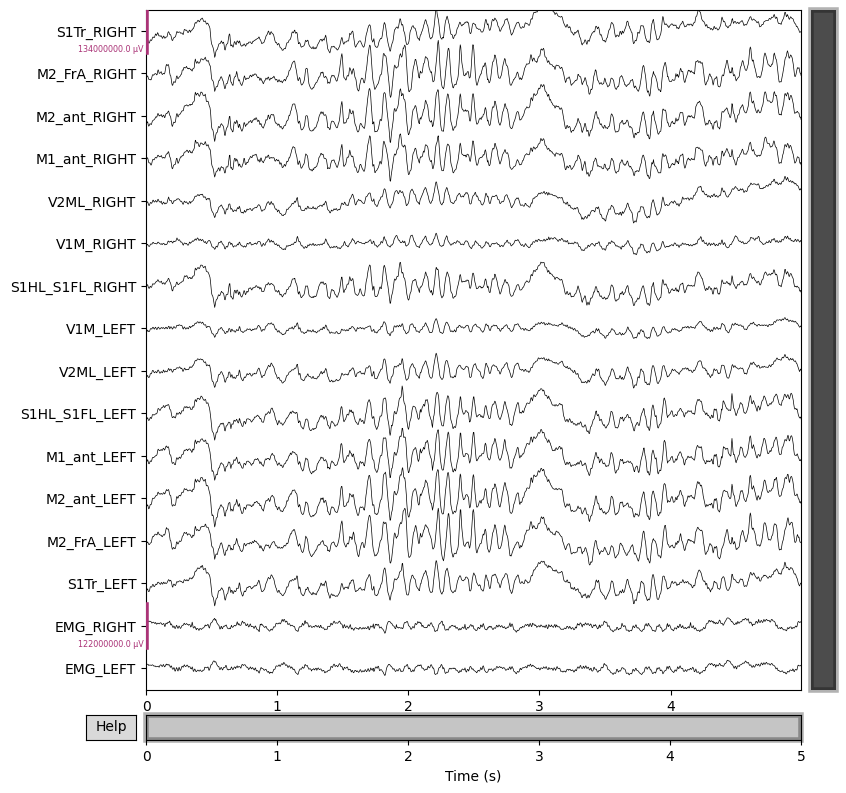

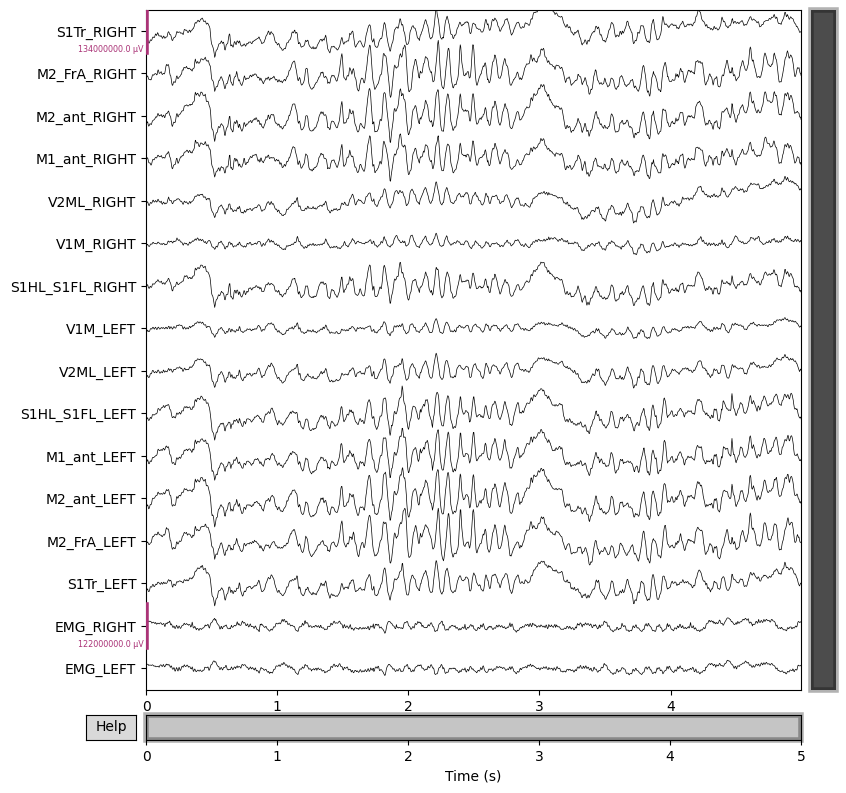

In [29]:
ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT','M2_ant_RIGHT','M1_ant_RIGHT', 'V2ML_RIGHT',
            'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT',
            'M1_ant_LEFT','M2_ant_LEFT','M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_types = ['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'emg', 'eeg']

raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)

raw = mne.io.RawArray(nr, raw_info)

raw.plot(scalings="auto")

In [30]:
rem = br_1_7098.loc[br_1_7098.brainstate == 2].sample() # REM
rem

,brainstate,start_epoch,end_epoch
14373,2,71865,71870


In [31]:
rem_time_start = int(rem.start_epoch * 250.4)
rem_time_end = int(rem.end_epoch * 250.4)
r = sliced_recording[:, rem_time_start:rem_time_end]

Creating RawArray with float64 data, n_channels=16, n_times=1252
    Range : 0 ... 1251 =      0.000 ...     4.996 secs
Ready.


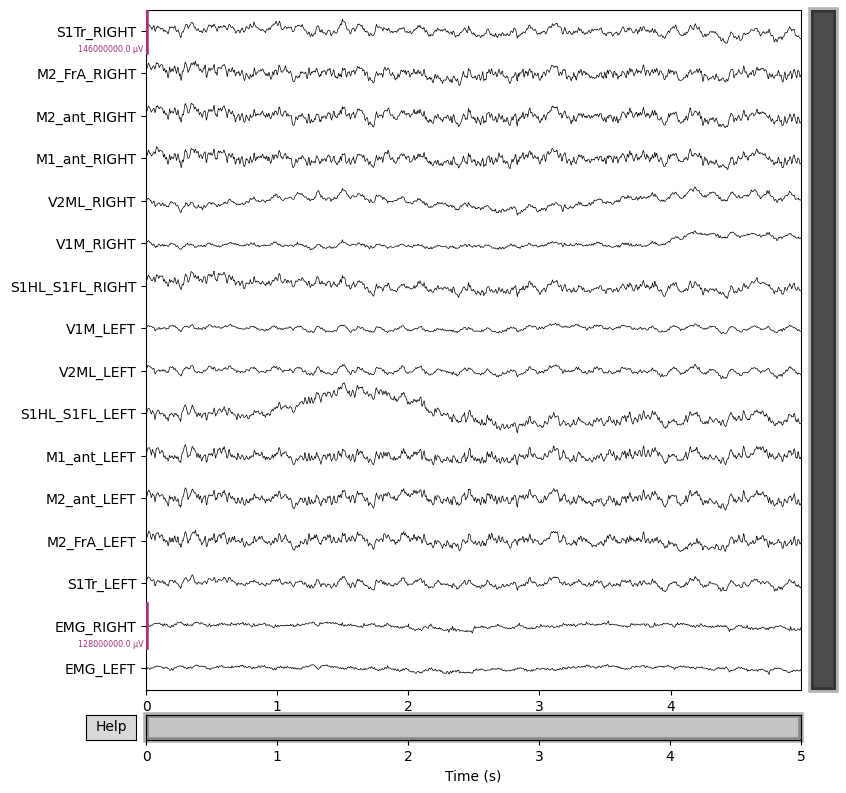

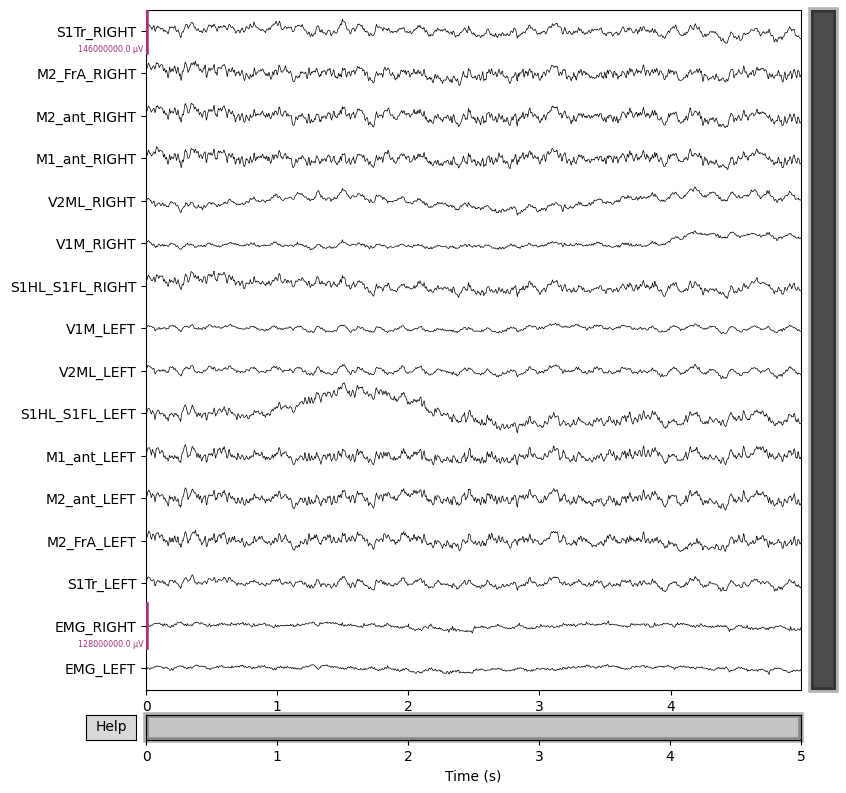

In [32]:
ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT','M2_ant_RIGHT','M1_ant_RIGHT', 'V2ML_RIGHT',
            'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT',
            'M1_ant_LEFT','M2_ant_LEFT','M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_types = ['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'emg', 'eeg']

raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)

raw = mne.io.RawArray(r, raw_info)

raw.plot(scalings="auto")